We want to approximate $sin(5x)$ on the interval [-1,1] via NN. Let's construct the graph of $sin(5x)$

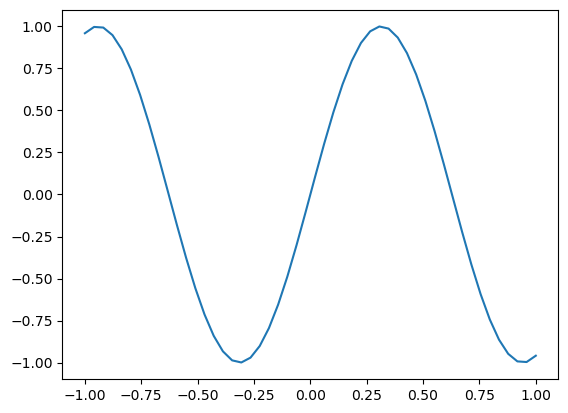

In [10]:
import numpy as np
x = np.linspace(-1, 1, 50)
sinx = np.sin(5 * x)

import matplotlib.pyplot as plt 
plt.plot(x, sinx)
plt.show()

Universal Approximation Theorem (UAT, Cybenko) says that arbitrary-width shallow (=1 layer) NN is dense in compact space of inputs if activation function is not polynomial.

In other words, if we take NN with large number of nodes with relu activations, our NN will approximate any function when input values are bounded. In our case, [-1, 1] is a bounded interval, so shallow NN can approximate $sin(5x)$ on [-1,1]. Let's check it.

We take NN with 150 nodes. Training takes 60 seconds

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten_19 (Flatten)        (None, 1)                 0         
                                                                 
 dense_38 (Dense)            (None, 150)               300       
                                                                 
 dense_39 (Dense)            (None, 1)                 151       
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 0s/step


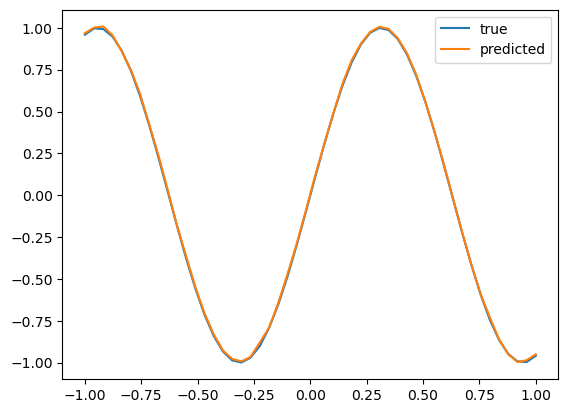

In [21]:
import numpy as np
x = np.linspace(-1, 1, 50)
sinx = np.sin(5 * x)

import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=()),
  tf.keras.layers.Dense(150, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(0, 1), 
                                                bias_initializer=tf.keras.initializers.RandomNormal(0, 1)), # sigmoid is worse
  tf.keras.layers.Dense(1, activation='linear', kernel_initializer=tf.keras.initializers.RandomNormal(0, 1),
                                                bias_initializer=tf.keras.initializers.RandomNormal(0, 1)) # tanh better than no activagion
])
print(model.summary())

model.compile(optimizer='adam', loss='mse')
model.fit(x, sinx, epochs=10_000, verbose=0, batch_size=5)
predictions = model.predict(x)

import matplotlib.pyplot as plt 
plt.plot(x, sinx, label='true')
plt.plot(x, predictions, label='predicted')
plt.legend(loc='best')
plt.show()